# DS-NYC-45 | Unit Project 4: Notebook with Executive Summary

In this project, you will summarize and present your analysis from Unit Projects 1-3.

> ## Question 1.  Introduction
> Write a problem statement for this project.

Answer: Using UCLA's student admission data, determine how likely an applicant is to be admitted into the program using GRE score, GPA score, and prestige of the alma mater

> ## Question 2.  Dataset
> Write up a description of your data and any cleaning that was completed.

Answer:

Data Dictionary:

Variable | Description | Type of Variable
---|---|---
Admit | 0 = not admitted, 1 = admitted | Categorical
GRE | integer score for Graduate Record Examination from 200 to 800 | Continuous
GPA | integer score for Grade Point Average from 0.0 to 4.0 | Continuous
Prestige | 1 = prestigeous, 2 = semi-prestigeous, 3 = less prestigeous, 4 = least prestigeous | Categorical

Original dataset included 400 entries. After examining the data it became apparent that three rows were missing data points so they were dropped. The cleaned dataset has 397 entries.

> ## Question 3.  Demo
> Provide a table that explains the data by admission status.

Answer:

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)

%matplotlib inline
plt.style.use('ggplot')

In [2]:
df = pd.read_csv(os.path.join('dataset', 'ucla-admissions.csv'))
df.dropna(inplace = True)

In [3]:
df.groupby('admit').describe().unstack()\
    .loc[:,(slice(None),['count','mean','min','max'])]

gpa                         gre                           prestige  \
       count      mean   min  max  count        mean    min    max    count   
admit                                                                         
0      271.0  3.347159  2.26  4.0  271.0  573.579336  220.0  800.0    271.0   
1      126.0  3.489206  2.42  4.0  126.0  618.571429  300.0  800.0    126.0   

                           
           mean  min  max  
admit                      
0      2.645756  1.0  4.0  
1      2.150794  1.0  4.0

> ## Question 4. Methods
> Write up the methods used in your analysis.

Answer: In my analysis I used the following methods:
- Created boxplots of gpa, gre, and prestige
- Created histograms of gpa, gre, and prestige
- Created a correlation heatmap matrix
- Changed prestige to be one hot encoded in order to understand the impact of prestige on admitance odds and then to ulimately understand the odds ratio
- Used statsmodel to fit a logistic regression that would predict admission based on gre, gpa, and prestige of undergraduate schools
- Recreated the logistic regression model with sklearn and a C= 10**2
- Compare the odds ratios between the statsmodel and sklearn model based on the coefficients for each  feature
- Assumed a GRE of 800 and GPA of 4 to predict the probability of admission by undergraduate school tier with our logistic modesl


> ## Question 5. Results
> Write up your results.

The odds ratios impact by each variable is:
- The odds of being admitted increase by ~.2% for every 1 point inrease in GRE
- The odds of being admitted increase by ~ 100% for every 1 point increase in GPA
- The odds of being admitted decrease by ~50% when undergraduate school prestige = 2
- The odds of being admitted decrease by ~75% when undergraduate school prestige = 3
- The odds of being admitted decrease by ~80% when undergraduate school prestige = 4

Given a GRE of 800 and GPA of 4.0, the logistic regression model predicts the following odds of admissions:
- Pres 1 = 73%
- Pres 2 = 57%
- Pres 3 = 40%
- Pres 4 = 35%


> ## Question 6. Visuals
> Provide a table or visualization of these results.

Answer:

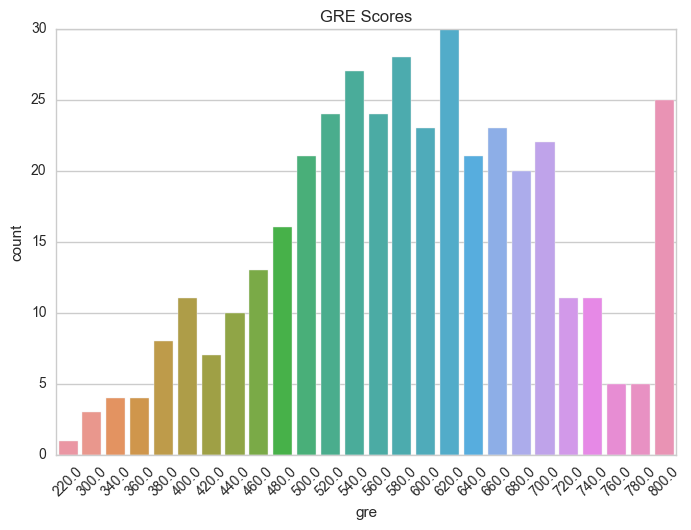

In [4]:
sns.set(style="whitegrid")
sns.countplot(x="gre", data=df)
plt.xticks(rotation=45)
sns.plt.title('GRE Scores')

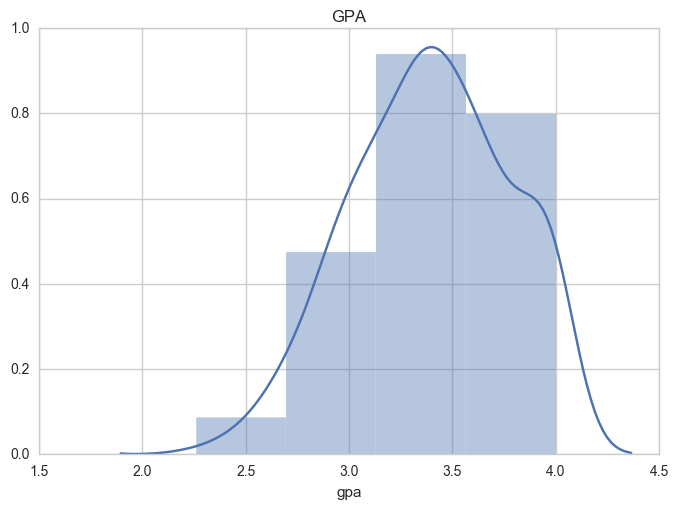

In [5]:
sns.set(style="whitegrid")
sns.distplot(df["gpa"], bins=4)
sns.plt.title('GPA')

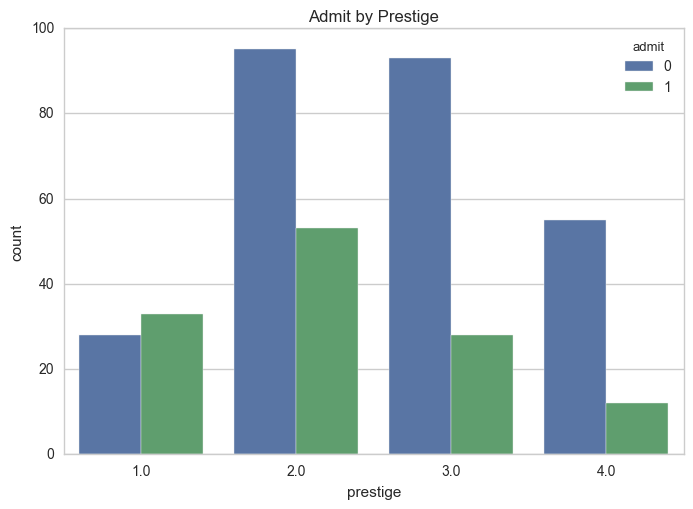

In [6]:
sns.set(style="whitegrid")
sns.countplot(x="prestige", hue="admit", data=df)
sns.plt.title('Admit by Prestige')

In [7]:
df_m=pd.concat([df, pd.get_dummies(df['prestige'],prefix='prestige')], axis=1)
df_m=df_m.drop(['prestige','prestige_1.0'],axis=1)
X=df_m.drop(['admit'],axis=1)
X['intercept']=1
y=df_m['admit']

logreg=smf.Logit(y,X)
result=logreg.fit()

Optimization terminated successfully.
         Current function value: 0.573854
         Iterations 6


In [8]:
result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  admit   No. Observations:                  397
Model:                          Logit   Df Residuals:                      391
Method:                           MLE   Df Model:                            5
Date:                Tue, 31 Jan 2017   Pseudo R-squ.:                 0.08166
Time:                        16:11:04   Log-Likelihood:                -227.82
converged:                       True   LL-Null:                       -248.08
                                        LLR p-value:                 1.176e-07
================================================================================
                   coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
gre              0.0022      0.001      2.028      0.043      7.44e-05     0.004
gpa              0.7793      0.333      2.344      0.019         0.128     1.431
prestige_2.0    -0.6801      0.317     -2.146      0.032        -1.301    -0.059
prestige_3.0    -1.3387      0.345     -3.882      0.000        -2.015    -0.663
prestige_4.0    -1.5534      0.417     -3.721      0.000        -2.372    -0.735
intercept       -3.8769      1.142     -3.393      0.001        -6.116    -1.638
================================================================================
"""

> ## Question 7.  Discussion
> Write up your discussion and future steps.

#### Discussion:
After analyzing UCLA's admissions data, we were able to determine that GPA, GRE, and undergraduate school Prestige significantly contribute to the odds of being admitted. As we initially suspected, the higher the GPA & the GRE coupled with the more presitgious the school, the more likely a candidate is to be admitted.

#### Next Steps:
- Increase our sample size (397 samples is small and the model could benefit from more data)
- Collect additional datapoints on the applicants to see what else influences admission such as undergraduate major, years of work experience, age, sex, etc.
- Apply model to other universtities' data to better understand the predictive power